In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir("C:\\Users\\Dinesh\\Desktop\\DataSets")

In [3]:
data=pd.read_csv('challenger.csv')

In [4]:
data

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [5]:
data.columns

Index(['o_ring_ct', 'O.ring.failures', 'temperature', 'pressure', 'launch_id'], dtype='object')

In [6]:
o_ring_failures=data["O.ring.failures"]

In [7]:
o_ring_failures

0     0
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    2
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    1
Name: O.ring.failures, dtype: int64

In [8]:
temp=data['temperature']

In [9]:
temp

0     66
1     70
2     69
3     68
4     67
5     72
6     73
7     70
8     57
9     63
10    70
11    78
12    67
13    53
14    67
15    75
16    70
17    81
18    76
19    79
20    75
21    76
22    58
Name: temperature, dtype: int64

Text(0.5,0,'temp')

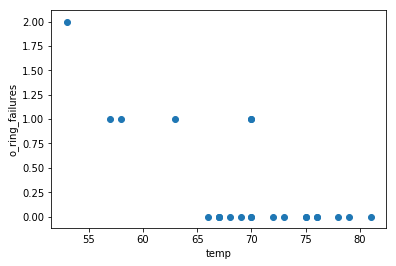

In [10]:
plt.scatter(temp,o_ring_failures)
plt.ylabel("o_ring_failures")
plt.xlabel("temp")

In [11]:
data.corr()

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
o_ring_ct,NaN,NaN,NaN,NaN,NaN
O.ring.failures,NaN,1.000000,-0.725671,0.220326,-0.011993
temperature,NaN,-0.725671,1.000000,0.039818,0.230770
pressure,NaN,0.220326,0.039818,1.000000,0.839932
launch_id,NaN,-0.011993,0.230770,0.839932,1.000000


In [12]:
pressure=data['pressure']

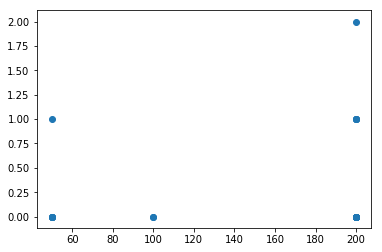

In [13]:
plt.scatter(pressure,o_ring_failures)

In [14]:
mean_o_ring_failures = o_ring_failures.mean()

In [15]:
mean_o_ring_failures

0.30434782608695654

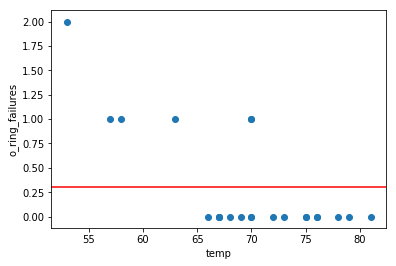

In [16]:
plt.scatter(temp,o_ring_failures)
plt.ylabel("o_ring_failures")
plt.xlabel("temp")
plt.axhline(mean_o_ring_failures,color='r')

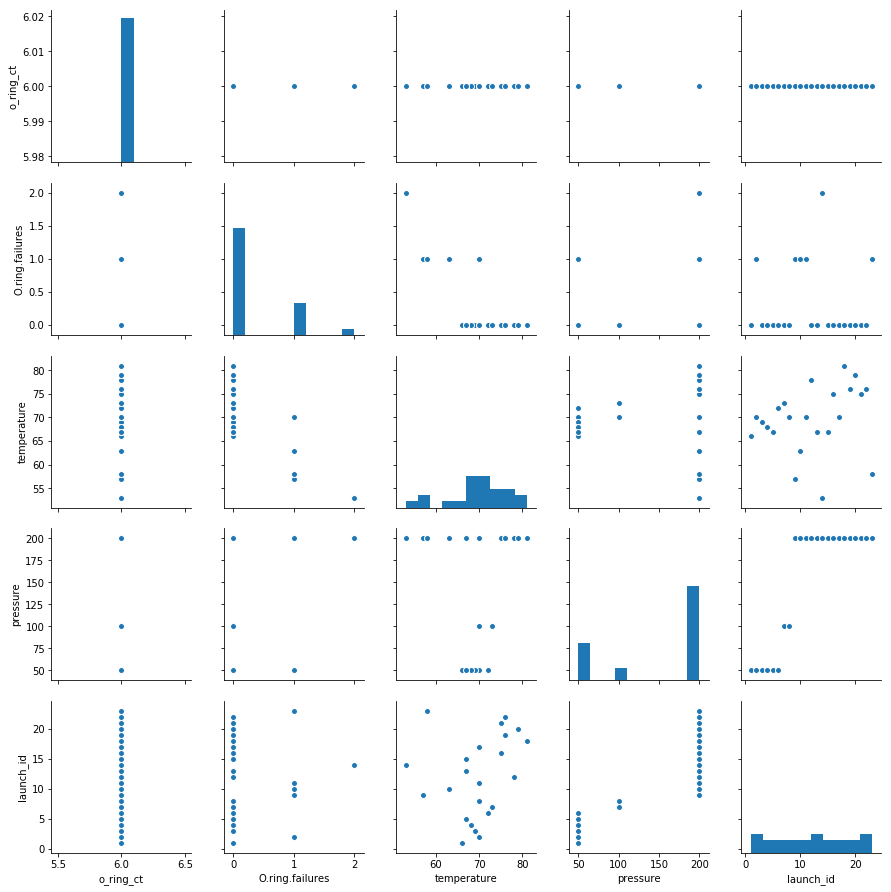

In [17]:
import seaborn as sns
sns.pairplot(data)

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


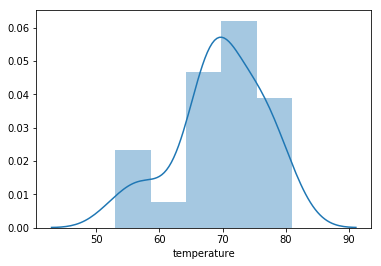

In [18]:
sns.distplot(temp)

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


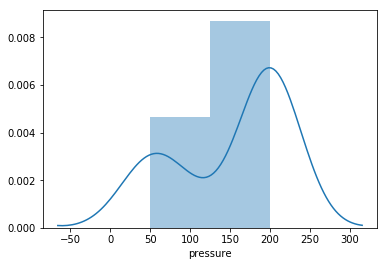

In [19]:
sns.distplot(pressure)

In [20]:
corr=data.corr()

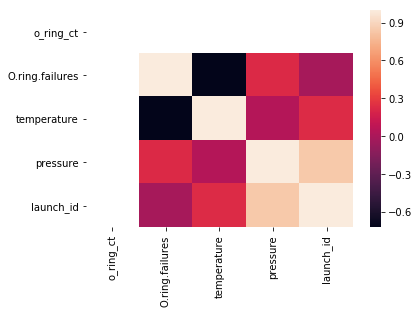

In [21]:
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [22]:
import statsmodels.api as sm
model=sm.OLS(o_ring_failures,temp).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     4.755
Date:                Tue, 14 May 2019   Prob (F-statistic):             0.0402
Time:                        09:38:25   Log-Likelihood:                -19.595
No. Observations:                  23   AIC:                             41.19
Df Residuals:                      22   BIC:                             42.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature     0.0038      0.002      2.181      0.040       0.000       0.007
==============================================================================
Omnibus:                       14.053   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.853
Skew:                           1.623   Prob(JB):                      0.00162
Kurtosis:                       4.696   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
import statsmodels.api as sm
model=sm.OLS(o_ring_failures,pressure).fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        O.ring.failures   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     8.278
Date:                Tue, 14 May 2019   Prob (F-statistic):            0.00875
Time:                        09:49:22   Log-Likelihood:                -18.173
No. Observations:                  23   AIC:                             38.35
Df Residuals:                      22   BIC:                             39.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
pressure       0.0020      0.001      2.877      0.009       0.001       0.003
==============================================================================
Omnibus:                       11.553   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                9.660
Skew:                           1.447   Prob(JB):                      0.00799
Kurtosis:                       4.306   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [97]:
from sklearn.model_selection import train_test_split

In [127]:
X_train,X_test,y_train,y_test= train_test_split(temp,o_ring_failures,test_size=0.4,random_state=1)

In [128]:
X_train

6     73
7     70
1     70
14    67
0     66
15    75
22    58
21    76
9     63
8     57
12    67
11    78
5     72
Name: temperature, dtype: int64

In [129]:
X_test

20    75
17    81
3     68
13    53
19    79
16    70
10    70
4     67
2     69
18    76
Name: temperature, dtype: int64

In [130]:
y_train

6     0
7     0
1     1
14    0
0     0
15    0
22    1
21    0
9     1
8     1
12    0
11    0
5     0
Name: O.ring.failures, dtype: int64

In [131]:
y_test

20    0
17    0
3     0
13    2
19    0
16    0
10    1
4     0
2     0
18    0
Name: O.ring.failures, dtype: int64

In [132]:
X_train=X_train.values.reshape(-1,1)

In [133]:
X_train

array([[73],
       [70],
       [70],
       [67],
       [66],
       [75],
       [58],
       [76],
       [63],
       [57],
       [67],
       [78],
       [72]], dtype=int64)

# Linear Regression with sklearn

In [134]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [138]:
temp=reg.fit(X_train,y_train)

In [139]:
accuracy = reg.score(X_train,y_train)

In [140]:
accuracy

0.49669252207783493

In [142]:
reg.intercept_

3.874282260501663

In [143]:
reg.coef_

array([-0.05197945])

In [146]:
X_test=X_test.values.reshape((-1,1))

In [147]:
X_test

array([[75],
       [81],
       [68],
       [53],
       [79],
       [70],
       [70],
       [67],
       [69],
       [76]], dtype=int64)

In [148]:
predictions=reg.predict(X_test)

In [149]:
predictions

array([-0.02417649, -0.33605319,  0.33967966,  1.11937141, -0.23209429,
        0.23572076,  0.23572076,  0.39165911,  0.28770021, -0.07615594])

In [150]:
y_test

20    0
17    0
3     0
13    2
19    0
16    0
10    1
4     0
2     0
18    0
Name: O.ring.failures, dtype: int64

Text(0,0.5,'predictions')

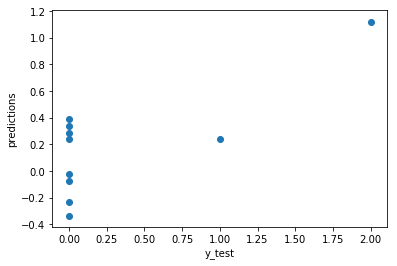

In [153]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

In [154]:
reg.predict(30)

array([2.31489876])

In [176]:
xnew=[[30],[40],[50],[60],[70]]

In [177]:
ynew=reg.predict(xnew)

In [178]:
ynew

array([2.31489876, 1.79510426, 1.27530976, 0.75551526, 0.23572076])

# Multilinear Regression

In [179]:
x=data[['temperature','pressure']]

In [181]:
y=data['O.ring.failures']

In [183]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [184]:
mult=reg.fit(X_train,y_train)

In [185]:
mult.score(X_test,y_test)

0.5668126718726314

In [186]:
mult.intercept_

3.5059952388602458

In [187]:
mult.coef_

array([-0.04907187,  0.00092419])

In [188]:
pred=mult.predict(X_test)

In [189]:
pred

array([ 0.01044238, -0.28398884,  0.21531743,  1.09002351, -0.1858451 ,
        0.25580173,  0.25580173])

In [190]:
y_test

20    0
17    0
3     0
13    2
19    0
16    0
10    1
Name: O.ring.failures, dtype: int64

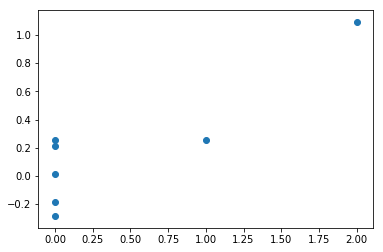

In [195]:
plt.scatter(y_test,pred)